In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

db = mysql.connector.connect(
    host = 'localhost',
    user ='root',
    password = 'anmol2004',
    database = 'ecommerce'
)
cursor = db.cursor(buffered=True)

In [62]:
# List all unique cities where customers are located.

# Execute query
query = """SELECT DISTINCT customer_city FROM customers"""
cursor.execute(query)

# Fetch all results
data = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Customer City"])

# Print as a table
print(df)





              Customer City
0                    franca
1     sao bernardo do campo
2                 sao paulo
3           mogi das cruzes
4                  campinas
...                     ...
4114                 siriji
4115    natividade da serra
4116           monte bonito
4117             sao rafael
4118      eugenio de castro

[4119 rows x 1 columns]


In [63]:
# Count the number of orders placed in 2017.

query = """SELECT COUNT(order_id) FROM orders WHERE YEAR(order_purchase_timestamp) = 2017"""
cursor.execute(query)

# Fetch the result
data = cursor.fetchone()  # COUNT returns a single value

# Print the count
print("Total Orders in 2017:", data[0])


Total Orders in 2017: 45101


In [64]:
# Find the total sales per category.

query = """
    SELECT 
        products.product_category AS category, 
        SUM(payments.payment_value) AS sales
    FROM products 
    JOIN order_items ON products.product_id = order_items.product_id
    JOIN payments ON order_items.order_id = payments.order_id  -- Fix table name
    GROUP BY category
"""
cursor.execute(query)
data = cursor.fetchall()

# Print results in a readable format
df = pd.DataFrame(data, columns=["Category", "Total Sales"])
print(df)


                       Category   Total Sales
0                     perfumery  5.067387e+05
1          Furniture Decoration  1.430176e+06
2                     telephony  4.868821e+05
3                bed table bath  1.712554e+06
4                    automotive  8.522943e+05
..                          ...           ...
69               cds music dvds  1.199430e+03
70                   La Cuisine  2.913530e+03
71  Fashion Children's Clothing  7.856700e+02
72                     PC Gamer  2.174430e+03
73       insurance and services  3.245100e+02

[74 rows x 2 columns]


In [65]:
# Calculate the percentage of orders that were paid in installments.

query = """
    SELECT 
        (SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) / COUNT(*)) * 100 
        AS installment_percentage
    FROM payments;
"""
cursor.execute(query)
data = cursor.fetchone()

# Print the percentage
print("Percentage of Orders Paid in Installments:", data[0], "%")



Percentage of Orders Paid in Installments: 49.4176 %


   State  Customer Count
0     SP           41746
1     RJ           12852
2     MG           11635
3     RS            5466
4     PR            5045
5     SC            3637
6     BA            3380
7     DF            2140
8     ES            2033
9     GO            2020
10    PE            1652
11    CE            1336
12    PA             975
13    MT             907
14    MA             747
15    MS             715
16    PB             536
17    PI             495
18    RN             485
19    AL             413
20    SE             350
21    TO             280
22    RO             253
23    AM             148
24    AC              81
25    AP              68
26    RR              46


<function matplotlib.pyplot.show(close=None, block=None)>

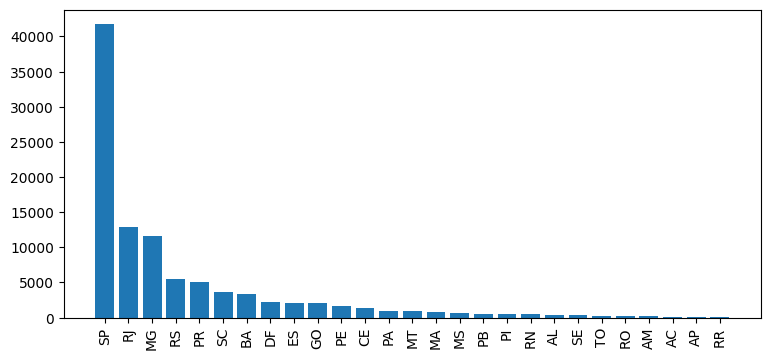

In [66]:
# Count the number of customers from each state. 

query = """
    SELECT customer_state, COUNT(customer_id) AS customer_count
    FROM customers
    GROUP BY customer_state
    ORDER BY customer_count DESC;
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas
df = pd.DataFrame(data, columns=["State", "Customer Count"])
print(df)
df = df.sort_values(by= "Customer Count", ascending = False)

plt.figure(figsize=(9,4))
plt.bar(df["State"] ,df ["Customer Count"])
plt.xticks(rotation = 90)
plt.show


       Month  Order Count
0       July         6292
1     August         6512
2   February         6728
3       June         6167
4      March         7211
5    January         7269
6        May         6873
7      April         6939
8  September           16
9    October            4


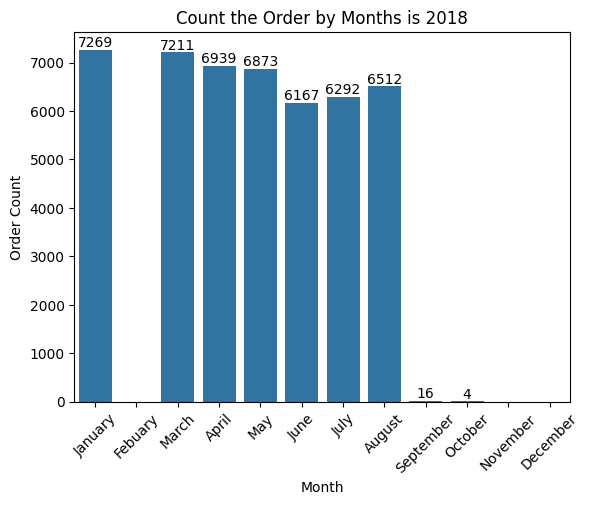

In [67]:
# Calculate the number of orders per month in 2018.
query = """
    select monthname(order_purchase_timestamp) months, count(order_id) order_count
    from orders where year(order_purchase_timestamp) = 2018
    group by months
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas
df = pd.DataFrame(data, columns=["Month", "Order Count"])
print(df)
# Assuming df has columns 'Month' and 'Order Count'
ax = sns.barplot(x=df["Month"], y=df["Order Count"], data=df, order=o)
plt.xticks(rotation = 45)

# show the lables on the graph too
ax.bar_label(ax.containers[0])

# showing the title
plt.title("Count the Order by Months is 2018")
plt.show()




In [68]:
# Find the average number of products per order, grouped by customer city.
query = """
    SELECT 
        c.customer_city, 
        AVG(order_product_counts.product_count) AS avg_products_per_order
    FROM (
        SELECT 
            o.customer_id, 
            o.order_id, 
            COUNT(oi.product_id) AS product_count
        FROM orders o
        JOIN order_items oi ON o.order_id = oi.order_id
        GROUP BY o.order_id, o.customer_id
    ) AS order_product_counts
    JOIN customers c ON order_product_counts.customer_id = c.customer_id
    GROUP BY c.customer_city
    ORDER BY avg_products_per_order DESC;
"""
cursor.execute(query)
data = cursor.fetchall()

# Display results in a readable format using Pandas

df = pd.DataFrame(data, columns=["Customer City", "Avg Products per Order"])
df.head(1110)


# # Assuming df has columns 'Customer City' and 'Avg Products per Order'
# ax = sns.barplot(x=df["Customer City"], y=df["Avg Products per Order"], data=df, order=o)
# plt.xticks(rotation = 40)

# # show the lables on the graph too
# ax.bar_label(ax.containers[0])

# # showing the title
# plt.title("Average number of products per order, grouped by customer city.")
# plt.show()



,Customer City,Avg Products per Order
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,candido godoi,6.0000
3,datas,6.0000
4,matias olimpio,5.0000
...,...,...
1105,ribeirao pires,1.1215
1106,amparo,1.1212
1107,taquaritinga,1.1212
1108,cotia,1.1210


In [69]:
# Calculate the percentage of total revenue contributed by each product category.

query = """
select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc
"""


cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


In [70]:
# Identify the correlation between product price and the number of times a product has been purchased.

cursor = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a= np.corrcoef([arr1,arr2])

a = ([arr1,arr2])
print("the correlation is", a[0][1])

the correlation is 8641


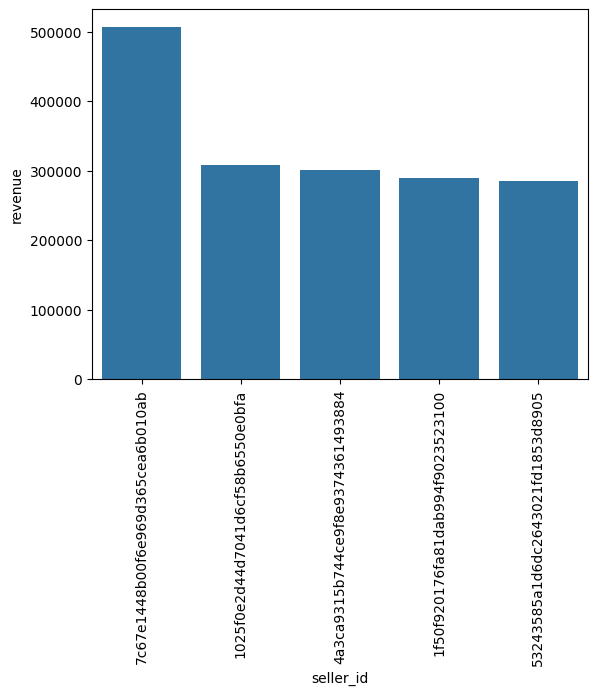

In [71]:
# Calculate the total revenue generated by each seller, and rank them by revenue.
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

In [72]:
# Calculate the moving average of order values for each customer over their order history.

query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [74]:
# Calculate the cumulative sales per month for each year.

query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [ ]:
# Calculate the year-over-year growth rate of total sales.

query = """with a as(select year(orders.order_purchase_timestamp) as years,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years order by years)

select years, ((payment - lag(payment, 1) over(order by years))/
lag(payment, 1) over(order by years)) * 100 from a"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["years", "yoy % growth"])
df

,years,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


In [77]:
# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cursor.execute(query)
data = cursor.fetchall()

data

[(None,)]

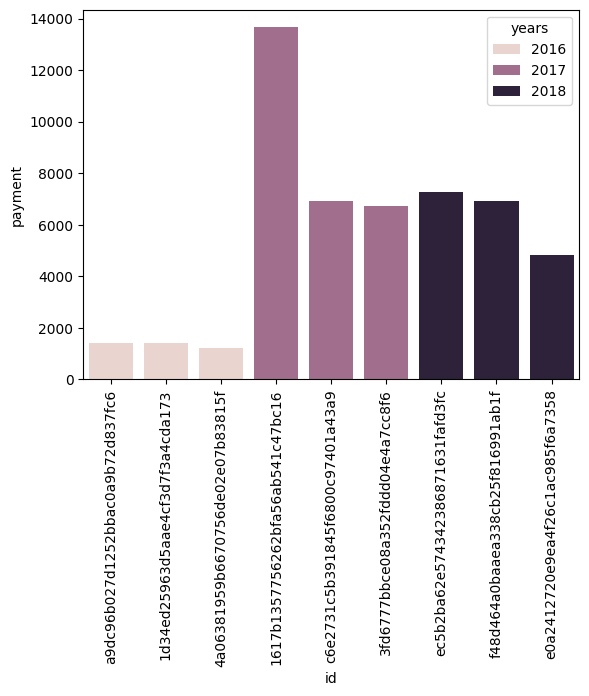

In [78]:
# Identify the top 3 customers who spent the most money in each year.

query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cursor.execute(query)
data = cursor.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()